<a href="https://colab.research.google.com/github/MayurPatil2711/SURE-IIT-Hyderabad/blob/main/IITH_SURE_Radius_Size_Calc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image

from scipy.spatial.distance import euclidean
from imutils import perspective
from imutils import contours
import imutils

import shutil
import pprint

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def Video_to_Frames(video_path, output_path, start_frame = 50, end_frame = 80):
  video_capture = cv2.VideoCapture(video_path)
  frame_number = 0
  frames_saved = 0
  while True:
    success, frame = video_capture.read()
    if not success:
      break

    cropped_frame = frame[140:290, 100:350] #second--> right_left crop, first-->up_down crop

    if frame_number >= start_frame and frame_number <= end_frame:
      frame_filename = os.path.join(output_path, f"frame_{frame_number:04d}.png")
      cv2.imwrite(frame_filename, cropped_frame)
      frames_saved += 1

    frame_number += 1
  video_capture.release()
  #print("\n", f"Total frames saved: {frames_saved}")
  return None

In [5]:
def show_images(images):
  for i, img in enumerate(images):
    plt.imshow(img)
  plt.show()

In [6]:
def Find_Bubble(files, frames_folder):
  diameters = []
  max_dia = 0
  max_img = None
  for i in range(len(files)):
    image_path = os.path.join(frames_folder, files[i])
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    #image = image[110:300, 100:300]
    contour_image = image.copy()
    '''
    plt.imshow(contour_image)
    plt.show()
    '''

    #print("copy generated")
    img = cv2.medianBlur(image,5)
    cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    #print("color changed")

    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 1000, param1=70,param2=30,minRadius=0,maxRadius=0)
    #3print("circles detected")
    if circles is not None:
      circles = np.uint16(np.around(circles))
      for i in circles[0,:]:
        if i[2]>max_dia:
          max_dia = i[2]
          max_img = cimg
        diameters.append(i[2])
        cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
        cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),2)
      '''
      plt.imshow(cimg)
      plt.show()
      print("\n")
      '''

  return diameters, max_img

In [7]:
def Delete_Files(dir_path, files):
  for i in range(len(files)):
    file_path = os.path.join(dir_path, files[i])
    if os.path.exists(file_path):
        os.remove(file_path)
        #print(f"File {file_path} deleted successfully.")
    else:
        print(f"File {file_path} not found.")
  return None

In [8]:
def Get_all_Videos(video_path):
  full_file_paths = []
  for root, dirs, files in os.walk(video_path):
    for file in files:
      full_file_paths.append(os.path.join(root, file))
  return full_file_paths

In [9]:
def Pipeline(video_folder, frames_path):
  all_videos_paths = Get_all_Videos(video_folder)
  final_max_diameters = {}
  for video_path in all_videos_paths:
    print("\n", video_path)
    Video_to_Frames(video_path, frames_path, 40, 120)
    files = os.listdir(frames_path)
    diameters, max_img = Find_Bubble(files, frames_path)
    plt.imshow(max_img)
    plt.show()
    final_max_diameters[f'{video_path}'] = max(diameters)
    Delete_Files(frames_path, files)
  return final_max_diameters


 /content/drive/MyDrive/IITH SURE/Videos/01_120V_with_0.25_offset_03-06-2024_C001H001S0001_C001H001S0001.avi


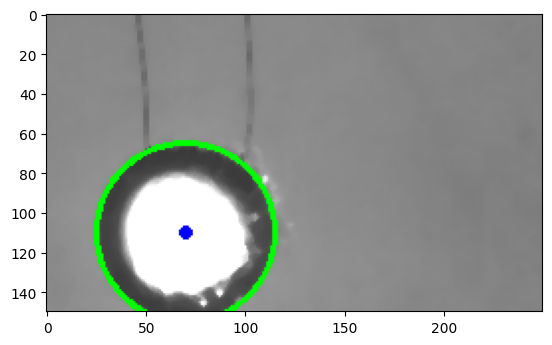


 /content/drive/MyDrive/IITH SURE/Videos/02_120V_with_0.25_offset_03-06-2024_C001H001S0001_C001H001S0001.avi


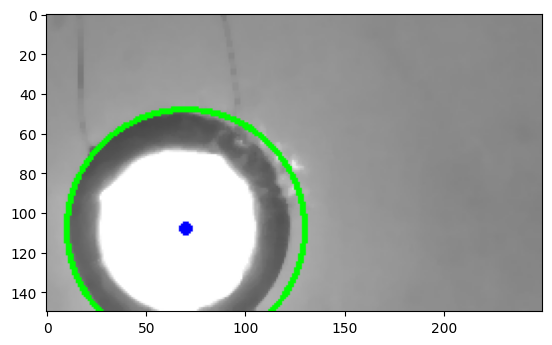


 /content/drive/MyDrive/IITH SURE/Videos/03_120V_with_0.25_offset_03-06-2024_C001H001S0001_C001H001S0001.avi


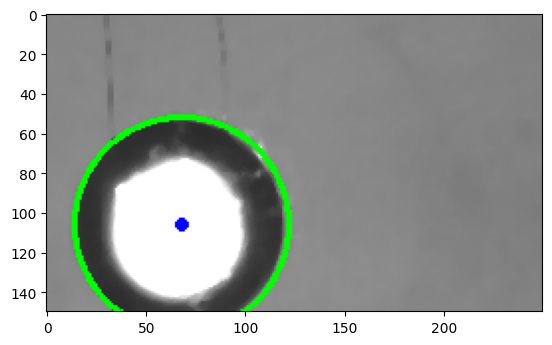


 /content/drive/MyDrive/IITH SURE/Videos/01_120V_with_0.125_offset_03-06-2024_C001H001S0001_C001H001S0001.avi


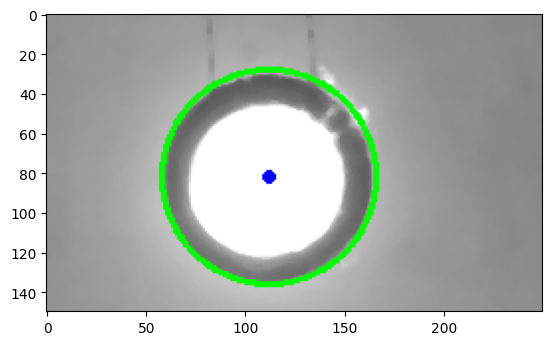


 /content/drive/MyDrive/IITH SURE/Videos/02_120V_with_0.125_offset_03-06-2024_C001H001S0001_C001H001S0001.avi


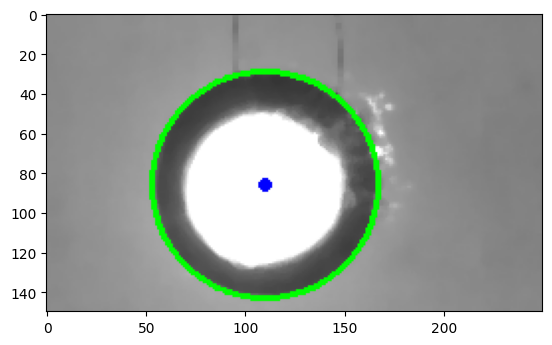


 /content/drive/MyDrive/IITH SURE/Videos/03_120V_with_0.125_offset_03-06-2024_C001H001S0001_C001H001S0001.avi


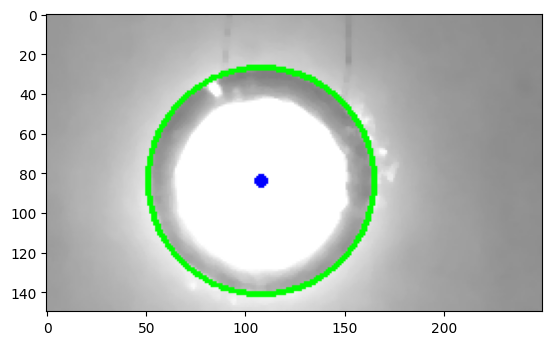


 /content/drive/MyDrive/IITH SURE/Videos/01_120V_with_0.0625_offset_03-06-2024_C001H001S0001_C001H001S0001.avi


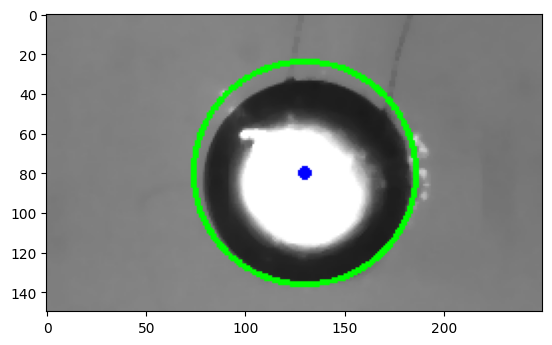


 /content/drive/MyDrive/IITH SURE/Videos/02_120V_with_0.0625_offset_03-06-2024_C001H001S0001_C001H001S0001.avi


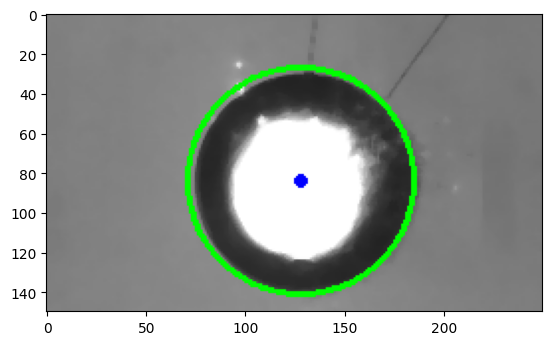


 /content/drive/MyDrive/IITH SURE/Videos/03_120V_with_0.0625_offset_03-06-2024_C001H001S0001_C001H001S0001.avi


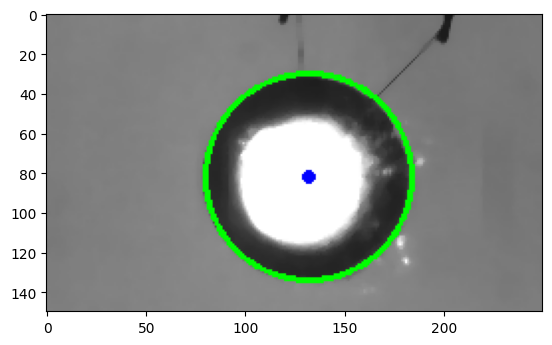


 /content/drive/MyDrive/IITH SURE/Videos/01_120V_with_0.03125_offset_03-06-2024_C001H001S0001_C001H001S0001.avi


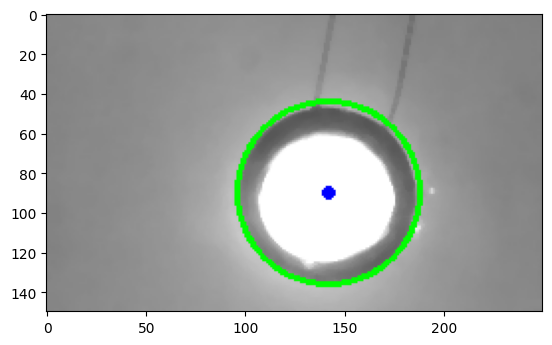


 /content/drive/MyDrive/IITH SURE/Videos/02_120V_with_0.03125_offset_03-06-2024_C001H001S0001_C001H001S0001.avi


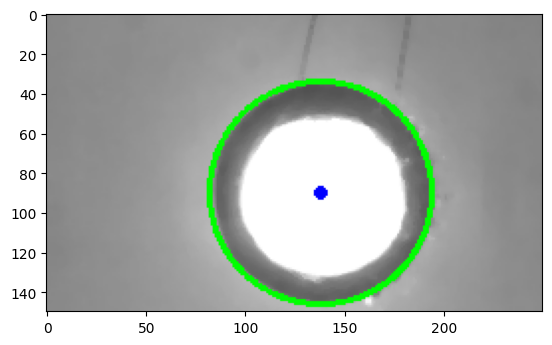


 /content/drive/MyDrive/IITH SURE/Videos/03_120V_with_0.03125_offset_03-06-2024_C001H001S0001_C001H001S0001.avi


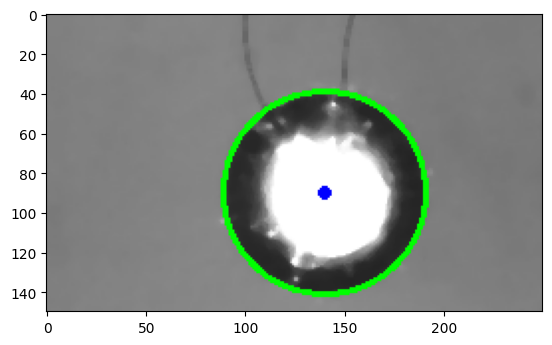


 /content/drive/MyDrive/IITH SURE/Videos/01_120V_with_0.1875_offset_03-06-2024_C001H001S0001_C001H001S0001.avi


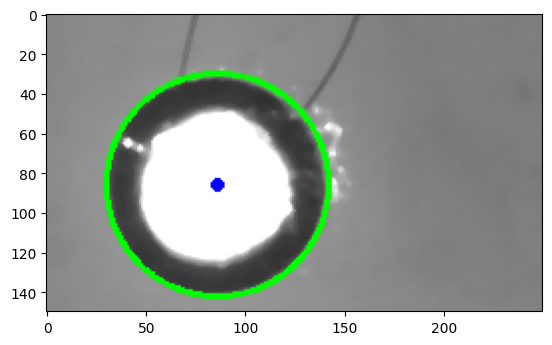


 /content/drive/MyDrive/IITH SURE/Videos/02_120V_with_0.1875_offset_03-06-2024_C001H001S0001_C001H001S0001.avi


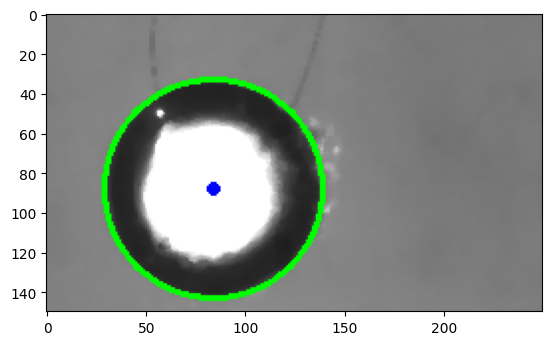


 /content/drive/MyDrive/IITH SURE/Videos/03_120V_with_0.1875_offset_03-06-2024_C001H001S0001_C001H001S0001.avi


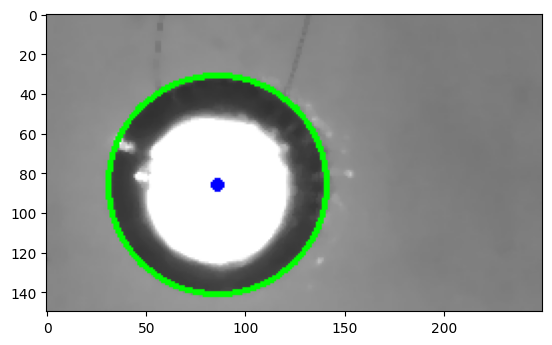



{'/content/drive/MyDrive/IITH SURE/Videos/01_120V_with_0.03125_offset_03-06-2024_C001H001S0001_C001H001S0001.avi': 46,
 '/content/drive/MyDrive/IITH SURE/Videos/01_120V_with_0.0625_offset_03-06-2024_C001H001S0001_C001H001S0001.avi': 56,
 '/content/drive/MyDrive/IITH SURE/Videos/01_120V_with_0.125_offset_03-06-2024_C001H001S0001_C001H001S0001.avi': 54,
 '/content/drive/MyDrive/IITH SURE/Videos/01_120V_with_0.1875_offset_03-06-2024_C001H001S0001_C001H001S0001.avi': 56,
 '/content/drive/MyDrive/IITH SURE/Videos/01_120V_with_0.25_offset_03-06-2024_C001H001S0001_C001H001S0001.avi': 45,
 '/content/drive/MyDrive/IITH SURE/Videos/02_120V_with_0.03125_offset_03-06-2024_C001H001S0001_C001H001S0001.avi': 56,
 '/content/drive/MyDrive/IITH SURE/Videos/02_120V_with_0.0625_offset_03-06-2024_C001H001S0001_C001H001S0001.avi': 57,
 '/content/drive/MyDrive/IITH SURE/Videos/02_120V_with_0.125_offset_03-06-2024_C001H001S0001_C001H001S0001.avi': 57,
 '/content/drive/MyDrive/IITH SURE/Videos/02_120V_with_0

In [10]:
video_path = '/content/drive/MyDrive/IITH SURE/Videos'
frames_path = '/content/drive/MyDrive/IITH SURE/Frames'
diameters = Pipeline(video_path, frames_path)
print("\n")
pprint.pprint(diameters)